In [1]:
import pandas as pd
import numpy as np
import os
import subprocess
from pandas.errors import EmptyDataError
import scipy.stats as st

In [2]:
rootdir = '/mnt/storage/SST/'
test_rootdir = '/mnt/storage/SST_ritesh/'
fsf_file_01 = '/mnt/storage/SST_ritesh_2/linear_template_run01.fsf'
fsf_file_02 = '/mnt/storage/SST_ritesh_2/linear_template_run02.fsf'

In [2]:
df_part_list = pd.read_csv("file_details_with_mri.csv").query("use_for_analysis == 'Yes'")
df_part_list

,src_subject_id,eventname,01_T1w.nii,01_bold.nii,02_bold.nii,has_baseline_b01_b02_T01,mri_info_visitid,mri_info_manufacturer,mri_info_manufacturersmn,mri_info_deviceserialnumber,...,mri_info_softwareversion,mri_info_studydate,imgincl_t1w_include,imgincl_t2w_include,imgincl_dmri_include,imgincl_rsfmri_include,imgincl_mid_include,imgincl_nback_include,imgincl_sst_include,use_for_analysis
0,NDARINV003RTV85,baselineYear1Arm1,sub-NDARINV003RTV85_ses-baselineYear1Arm1_run-...,sub-NDARINV003RTV85_ses-baselineYear1Arm1_task...,sub-NDARINV003RTV85_ses-baselineYear1Arm1_task...,Yes,S042_INV003RTV85_baseline,SIEMENS,Prisma_fit,sub-NDAR,...,syngo MR E11,20181001.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Yes
3,NDARINV00BD7VDC,baselineYear1Arm1,sub-NDARINV00BD7VDC_ses-baselineYear1Arm1_run-...,sub-NDARINV00BD7VDC_ses-baselineYear1Arm1_task...,sub-NDARINV00BD7VDC_ses-baselineYear1Arm1_task...,Yes,S090_INV00BD7VDC_baseline,SIEMENS,Prisma_fit,HASH65b39280,...,syngo MR E11,20180612.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Yes
6,NDARINV00CY2MDM,baselineYear1Arm1,sub-NDARINV00CY2MDM_ses-baselineYear1Arm1_run-...,sub-NDARINV00CY2MDM_ses-baselineYear1Arm1_task...,sub-NDARINV00CY2MDM_ses-baselineYear1Arm1_task...,Yes,S021_INV00CY2MDM_baseline,SIEMENS,Prisma,HASHd422be27,...,syngo MR E11,20170822.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Yes
9,NDARINV00HEV6HB,baselineYear1Arm1,sub-NDARINV00HEV6HB_ses-baselineYear1Arm1_run-...,sub-NDARINV00HEV6HB_ses-baselineYear1Arm1_task...,sub-NDARINV00HEV6HB_ses-baselineYear1Arm1_task...,Yes,S012_INV00HEV6HB_baseline,SIEMENS,Prisma_fit,HASHe4f6957a,...,syngo MR E11,20170708.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Yes
12,NDARINV00LH735Y,baselineYear1Arm1,sub-NDARINV00LH735Y_ses-baselineYear1Arm1_run-...,sub-NDARINV00LH735Y_ses-baselineYear1Arm1_task...,sub-NDARINV00LH735Y_ses-baselineYear1Arm1_task...,Yes,S011_INV00LH735Y_baseline,SIEMENS,Prisma,HASH5b0cf1bb,...,syngo MR E11,20180130.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21478,NDARINVZZ6ZJ2KY,baselineYear1Arm1,sub-NDARINVZZ6ZJ2KY_ses-baselineYear1Arm1_run-...,sub-NDARINVZZ6ZJ2KY_ses-baselineYear1Arm1_task...,sub-NDARINVZZ6ZJ2KY_ses-baselineYear1Arm1_task...,Yes,S042_INVZZ6ZJ2KY_baseline,SIEMENS,Prisma_fit,HASH96a0c182,...,syngo MR E11,20180111.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,Yes
21481,NDARINVZZ81LEEV,baselineYear1Arm1,sub-NDARINVZZ81LEEV_ses-baselineYear1Arm1_run-...,sub-NDARINVZZ81LEEV_ses-baselineYear1Arm1_task...,sub-NDARINVZZ81LEEV_ses-baselineYear1Arm1_task...,Yes,S076_INVZZ81LEEV_baseline,SIEMENS,Prisma,HASH03db707f,...,syngo MR E11,20170711.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Yes
21485,NDARINVZZJ3A7BK,baselineYear1Arm1,sub-NDARINVZZJ3A7BK_ses-baselineYear1Arm1_run-...,sub-NDARINVZZJ3A7BK_ses-baselineYear1Arm1_task...,sub-NDARINVZZJ3A7BK_ses-baselineYear1Arm1_task...,Yes,S042_INVZZJ3A7BK_baseline,SIEMENS,Prisma_fit,HASH96a0c182,...,syngo MR E11,20171009.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Yes
21488,NDARINVZZLZCKAY,baselineYear1Arm1,sub-NDARINVZZLZCKAY_ses-baselineYear1Arm1_run-...,sub-NDARINVZZLZCKAY_ses-baselineYear1Arm1_task...,sub-NDARINVZZLZCKAY_ses-baselineYear1Arm1_task...,Yes,S042_INVZZLZCKAY_baseline,SIEMENS,Prisma_fit,HASH96a0c182,...,syngo MR E11,20170826.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Yes


In [7]:
part_ids = df_part_list.iloc[:60,0].to_numpy()
part_ids

array(['NDARINV003RTV85', 'NDARINV00BD7VDC', 'NDARINV00CY2MDM',
       'NDARINV00HEV6HB', 'NDARINV00LH735Y', 'NDARINV00R4TXET',
       'NDARINV00UMK5VC', 'NDARINV00X2TBWJ', 'NDARINV01AJ15N9',
       'NDARINV01NAYMZH', 'NDARINV01RGTWD2', 'NDARINV01Z8HAPV',
       'NDARINV021403LF', 'NDARINV021N0FLH', 'NDARINV022ZVCT8',
       'NDARINV028WCTG6', 'NDARINV02EBX0JJ', 'NDARINV02JXJUZG',
       'NDARINV02RCED7D', 'NDARINV02UVMTY7', 'NDARINV030X9ZNH',
       'NDARINV0387TP8R', 'NDARINV03CV8RDT', 'NDARINV040B4TRC',
       'NDARINV042UJKFB', 'NDARINV04CLBZAD', 'NDARINV04EUBGTM',
       'NDARINV04P0G6LK', 'NDARINV04R9REGF', 'NDARINV04TRXUGL',
       'NDARINV052HU3CU', 'NDARINV059VLAHF', 'NDARINV05CA3VX5',
       'NDARINV05X0LM1N', 'NDARINV05YY477E', 'NDARINV06A9DLE9',
       'NDARINV06BKAHN5', 'NDARINV06DP74KL', 'NDARINV06WHVUPX',
       'NDARINV07BR8GMY', 'NDARINV07RPB2TU', 'NDARINV07THBLHG',
       'NDARINV07XG8391', 'NDARINV07XXFHDK', 'NDARINV085CYDEZ',
       'NDARINV086114AT', 'NDARINV08AT7T

In [9]:
pd.Series(part_ids, name="SubjectIDs").to_csv("subject_same_mri.csv", index=None)

In [ ]:
f"cp -r {rootdir}sub-{part_ids[0]} {test_rootdir}"

In [ ]:
for id in part_ids:
    cp_cmd = f"cp -r {rootdir}sub-{id} {test_rootdir}"
    print(cp_cmd)
    #os.system(cp_cmd)

In [ ]:
bet_cmd = (f"/usr/local/fsl/bin/bet "
 f"{test_rootdir}sub-{part_ids[0]}/ses-baselineYear1Arm1/anat/sub-{part_ids[0]}_ses-baselineYear1Arm1_run-01_T1w " 
 f"{test_rootdir}sub-{part_ids[0]}/ses-baselineYear1Arm1/anat/sub-{part_ids[0]}_ses-baselineYear1Arm1_run-01_T1w_brain " 
 f"-f 0.5 -g 0"
 )

In [ ]:
bet_cmd

In [ ]:
for id in part_ids:
    bet_cmd = (f"/usr/local/fsl/bin/bet "
                f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/anat/sub-{id}_ses-baselineYear1Arm1_run-01_T1w " 
                f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/anat/sub-{id}_ses-baselineYear1Arm1_run-01_T1w_brain " 
                f"-f 0.5 -g 0"
                )
    print(bet_cmd)
    #os.system(bet_cmd) #uncomment only for new participants

In [ ]:
f"{test_rootdir}sub-{part_ids[0]}/ses-baselineYear1Arm1/func/sub-{part_ids[0]}_ses-baselineYear1Arm1_task-sst_run-01_events.tsv"

In [ ]:
df = (pd
 .read_csv(f"{test_rootdir}sub-{part_ids[0]}/ses-baselineYear1Arm1/func/sub-{part_ids[0]}_ses-baselineYear1Arm1_task-sst_run-01_events.tsv", 
           delimiter="\t", dtype=object)
 .drop(0, axis=0)
 .assign(separator = lambda df: df["trial_type"].apply(lambda val: "go" if "go" in val else val ))
 .assign(trial_type=1)
            )

df.iat[0,0] = 0
df

In [ ]:
pd.read_csv(f"{test_rootdir}sub-{part_ids[2]}/ses-baselineYear1Arm1/func/sub-{part_ids[2]}_ses-baselineYear1Arm1_task-sst_run-01_events.tsv", 
           delimiter="\t", dtype=object).query("trial_type == 'ssd_stop'")

In [ ]:
for file_id in range(1,3):
    print(file_id)

# All Groups

In [ ]:
df_all = pd.DataFrame()
for id in part_ids:
        for file_id in range(1,3):
                df = (pd
                        .read_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-0{file_id}_events.tsv", 
                                delimiter="\t", dtype=object)
                        .drop(0, axis=0)
                        .assign(separator = lambda df: df["trial_type"].apply(lambda val: "go" if "go" in val else val ))
                        .assign(file_id=file_id)
                                )
                df_all = pd.concat([df_all,df])
df_all.groupby("separator").count()


In [ ]:
df_all.astype({"duration":float}).groupby("trial_type")["duration"].mean()

# Custom Groups

In [ ]:
"incorrect" in "incorrect_go"

In [ ]:
def find_label(val):
        if "go" in val and "incorrect" in val:
                return "incorrectgo"
        elif "stop" in val and "incorrect" in val:
                return "incorrectstop"
        
        elif "go" in val and "correct" in val:
                return "correctgo"
        elif "stop" in val and "correct" in val:
                return "correctstop"
        
        elif "noresp_go" in val:
                return "norespgo"
        
        elif "ssd_stop" in val:
                return "ssdstop"

In [ ]:
df_all = pd.DataFrame()
for id in part_ids:
        for file_id in range(1,3):
                df = (pd
                        .read_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-0{file_id}_events.tsv", 
                                delimiter="\t", dtype=object)
                        .drop(0, axis=0)
                        .assign(separator = lambda df: df["trial_type"].apply(lambda val: find_label(val) ))
                        .assign(file_id=file_id, part_id = id)
                                )
                df_all = pd.concat([df_all,df])
df_all.groupby(["separator", "file_id", "part_id"]).count()#.reset_index().query("separator == 'norespgo'").sort_values("trial_type", ascending=False)

In [ ]:
corgo = df_all.groupby(["separator", "file_id", "part_id"]).count().loc["correctgo","onset"].reset_index().astype({"file_id":str}).assign(part_run = lambda df: df.file_id + df.part_id, type="correctgo")[["type", "onset"]]
correctstop = df_all.groupby(["separator", "file_id", "part_id"]).count().loc["correctstop","onset"].reset_index().astype({"file_id":str}).assign(part_run = lambda df: df.file_id + df.part_id, type="correctstop")[["type", "onset"]]
norespgo = df_all.groupby(["separator", "file_id", "part_id"]).count().loc["norespgo","onset"].reset_index().astype({"file_id":str}).assign(part_run = lambda df: df.file_id + df.part_id, type="norespgo")[["type", "onset"]]

In [ ]:
pd.concat([corgo, correctstop,norespgo]).pivot(columns="type", values="onset").corr()

In [ ]:
sep_arr = df_all["separator"].unique()
sep_arr

# Creating time files

In [ ]:
for id in part_ids:
        for file_id in range(1,3):
                df = (pd
                        .read_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-0{file_id}_events.tsv", 
                                delimiter="\t", dtype=object)
                        .drop(0, axis=0)
                        .assign(separator = lambda df: df["trial_type"].apply( lambda val: find_label(val) ))
                        .assign(trial_type=1)
                                )

                df.iat[0,0] = 0
                df.query("separator=='correctgo'").drop("separator",axis=1).to_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-0{file_id}_corrGo.tsv", sep="\t", header=False, index=False)
                df.query("separator=='incorrectgo'").drop("separator",axis=1).to_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-0{file_id}_incorrGo.tsv", sep="\t", header=False, index=False)
                df.query("separator=='correctstop'").drop("separator",axis=1).to_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-0{file_id}_corrStop.tsv", sep="\t", header=False, index=False)
                df.query("separator=='incorrectstop'").drop("separator",axis=1).to_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-0{file_id}_incorrStop.tsv", sep="\t", header=False, index=False)
                df.query("separator=='norespgo'").drop("separator",axis=1).to_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-0{file_id}_norespgo.tsv", sep="\t", header=False, index=False)
                df.query("separator=='ssdstop'").drop("separator",axis=1).to_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-0{file_id}_ssdstop.tsv", sep="\t", header=False, index=False)


In [ ]:
timing_files = ["corrGo","incorrGo","corrStop","incorrStop", "norespgo" ,"ssdstop"]

In [ ]:
row = []

for id in part_ids:
        
        print(id)
        for file_id in range(1,3):
            for t_f in timing_files:   
                col = {}
                col.update({"id":id})
                try:             
                    df_t = pd.read_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-0{file_id}_{t_f}.tsv", sep="\t", header=None)
                    print("trial", file_id, ":" ,t_f,":", df_t.shape, end='|')
                    col.update({"run":file_id, "timing_file":t_f, "rowcount":df_t.shape[0]})
                except EmptyDataError as e:
                     print("trial", file_id, ":" ,t_f,":", "Empty file", end='|')
                     col.update({"run":file_id, "timing_file":t_f, "rowcount":0})
                row.append(col)
        print("********")
        
            
df_timing = pd.DataFrame(row)
df_timing

In [ ]:
df_timing.query("timing_file == 'ssdstop'").groupby("rowcount").count()[["timing_file"]].reset_index().rename({"rowcount":"row_count_in_file", "timing_file":"timing_file_count"},axis=1)

In [ ]:
df_timing.query("timing_file == 'norespgo'")

In [ ]:
df_timing.query("timing_file == 'ssdstop'")

In [ ]:
with open(fsf_file_01, 'r') as f:
    orig_content_01 = f.read()
with open(fsf_file_02, 'r') as f:
    orig_content_02 = f.read()
print(orig_content_02)

In [ ]:
file_name="11_09"
for id in part_ids:
    if (True): #(id != "NDARINV003RTV85"):
        folder_name = f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/design/"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)

        with open(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/design/run-01-design_{file_name}.fsf", 'w') as f:
            f.write(orig_content_01.replace("NDARINV003RTV85",id))
            f.close()

        with open(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/design/run-02-design_{file_name}.fsf", 'w') as f:
            f.write(orig_content_02.replace("NDARINV003RTV85",id))
            f.close()

In [ ]:
# NDARINV08K0R9C4, NDARINV01AJ15N9

In [ ]:
part_ids[0:1]

In [ ]:
import multiprocessing as mp
def fsf(id):
    print(id)
    os.chdir(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/design/")
    print("run-01")
    output = subprocess.getoutput(f"feat run-01-design_{file_name}.fsf")
    print(output)
    print("run-02")
    output = subprocess.getoutput(f"feat run-02-design_{file_name}.fsf")
    print(output)

mp.Pool(fsf, part_ids, processes=50)

for id in part_ids:
        print(id)
        os.chdir(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/design/")
        print("run-01")
        output = subprocess.getoutput(f"feat run-01-design_{file_name}.fsf")
        print(output)
        print("run-02")
        output = subprocess.getoutput(f"feat run-02-design_{file_name}.fsf")
        print(output)

# Resample Zfstats

In [3]:
img_name = ["zfstat1", "zfstat2", "zfstat3", "zfstat4", "zfstat5", "zfstat6"]
ev_names = ["corGo", "incGo",  "corStop", "incStop", "corStop-corGo", "incStop-incGo"]
ev_ids = list(range(1,7))

In [ ]:
for id in part_ids:
    #print(id)
    for img in img_name:
        #print(img)
        cmd_run01 = f'/usr/local/fsl/bin/flirt -in {test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-01LN.feat/stats/{img}.nii.gz -applyxfm -init {test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-01LN.feat/reg/example_func2standard.mat -out sub-{id}_{img}_run-01_LN -paddingsize 0.0 -interp trilinear -ref /usr/local/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz'
        cmd_run02 = f'/usr/local/fsl/bin/flirt -in {test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-02LN.feat/stats/{img}.nii.gz -applyxfm -init {test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/sub-{id}_ses-baselineYear1Arm1_task-sst_run-02LN.feat/reg/example_func2standard.mat -out sub-{id}_{img}_run-02_LN -paddingsize 0.0 -interp trilinear -ref /usr/local/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz'
        
        folder_name = f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/stats_roi"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        
        os.chdir(folder_name)
        print("run-01")
        print(cmd_run01)
        output = subprocess.getoutput(cmd_run01)
        print(output)
        print("run-02")
        output = subprocess.getoutput(cmd_run02)
        print(output)

In [ ]:
for id in part_ids:
    print(id)
    for img in img_name:
        print(img)
        dir_cmd = f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/stats_roi"
        print(dir_cmd)
        os.chdir(dir_cmd)
        fslmeants_cmd_01 = f"fslmeants -i sub-{id}_{img}_run-01_LN.nii -m /mnt/storage/masks/grantmask_labeled.nii --showall -o sub-{id}_{img}_run-01_LN.txt"
        fslmeants_cmd_02 = f"fslmeants -i sub-{id}_{img}_run-02_LN.nii -m /mnt/storage/masks/grantmask_labeled.nii --showall -o sub-{id}_{img}_run-02_LN.txt"
        print(fslmeants_cmd_01)
        output = subprocess.getoutput(fslmeants_cmd_01)
        print(fslmeants_cmd_02)
        output = subprocess.getoutput(fslmeants_cmd_02)


In [4]:
import nibabel as nib
img = nib.load("/mnt/storage/masks/grantmask_labeled.nii.gz")
mask = img.get_fdata()

In [10]:
df_neur = pd.DataFrame()
missing_ids = []

for id in part_ids:
    skip_loop = False
    #print(id)
    for imgn in img_name:
        #print(imgn)
        for run in ["run-01", "run-02"]:
            try:
                df_t = pd.read_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/stats_roi/sub-{id}_{imgn}_{run}_LN.txt", delimiter="  ", header=None)
            except:
                missing_ids.append(id)
                skip_loop = True
                break
            else:
                df_t1 = df_t.T.rename(columns={0:"x", 1:"y", 2:"z", 3:"activation"}).astype({"x":int, "y":int,"z":int}) #.set_index(keys=["x", "y", "z"])
                df_t1.loc[:,"roi"] = mask[df_t1["x"], df_t1["y"], df_t1["z"]].astype(int)
                df_neur = pd.concat([df_neur, df_t1.assign(subid=id, image=imgn, run=run)])
        if (skip_loop):
            break
print("mising ids", missing_ids)

/tmp/ipykernel_2535186/257819666.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_t = pd.read_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/stats_roi/sub-{id}_{imgn}_{run}_LN.txt", delimiter="  ", header=None)
/tmp/ipykernel_2535186/257819666.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_t = pd.read_csv(f"{test_rootdir}sub-{id}/ses-baselineYear1Arm1/func/stats_roi/sub-{id}_{imgn}_{run}_LN.txt", delimiter="  ", header=None)
/tmp/ipykernel_2535186/257819666.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separat

mising ids ['NDARINV00BD7VDC', 'NDARINV00CY2MDM', 'NDARINV00HEV6HB', 'NDARINV01AJ15N9', 'NDARINV08K0R9C4', 'NDARINV0B7UGM1D']


In [5]:
df_neur = pd.read_csv("roi_activation_all.csv")
df_neur

,x,y,z,activation,roi,subid,image,run
0,46,87,29,-0.685750,10,NDARINV003RTV85,corGo,run-01
1,45,85,30,-0.049403,10,NDARINV003RTV85,corGo,run-01
2,46,85,30,0.137194,10,NDARINV003RTV85,corGo,run-01
3,47,85,30,0.188199,10,NDARINV003RTV85,corGo,run-01
4,44,86,30,-0.315609,10,NDARINV003RTV85,corGo,run-01
...,...,...,...,...,...,...,...,...
876739,57,66,67,-0.356797,5,NDARINV0BEHBEJ3,incStop-incGo,run-02
876740,58,66,67,-0.702194,5,NDARINV0BEHBEJ3,incStop-incGo,run-02
876741,59,66,67,-1.229823,5,NDARINV0BEHBEJ3,incStop-incGo,run-02
876742,30,68,67,-0.171098,6,NDARINV0BEHBEJ3,incStop-incGo,run-02


In [3]:
nam_dict = dict(zip(img_name, ev_names))
nam_dict
df_neur = df_neur.replace({"image": nam_dict})
df_neur

NameError: name 'img_name' is not defined

In [12]:
df_neur.to_csv("roi_activation_all.csv", index=False)
df_neur

,x,y,z,activation,roi,subid,image,run
0,46,87,29,-0.685750,10,NDARINV003RTV85,corGo,run-01
1,45,85,30,-0.049403,10,NDARINV003RTV85,corGo,run-01
2,46,85,30,0.137194,10,NDARINV003RTV85,corGo,run-01
3,47,85,30,0.188199,10,NDARINV003RTV85,corGo,run-01
4,44,86,30,-0.315609,10,NDARINV003RTV85,corGo,run-01
...,...,...,...,...,...,...,...,...
1348,57,66,67,-0.356797,5,NDARINV0BEHBEJ3,incStop-incGo,run-02
1349,58,66,67,-0.702194,5,NDARINV0BEHBEJ3,incStop-incGo,run-02
1350,59,66,67,-1.229823,5,NDARINV0BEHBEJ3,incStop-incGo,run-02
1351,30,68,67,-0.171098,6,NDARINV0BEHBEJ3,incStop-incGo,run-02


In [51]:
df = df_neur.drop(columns=["x","y","z"]).groupby(["roi", "subid","image","run"]).mean().reset_index()
df.to_csv("roi_activation.csv", index=False)
df

,roi,subid,image,run,activation
0,1,NDARINV003RTV85,corGo,run-01,-0.052934
1,1,NDARINV003RTV85,corGo,run-02,-0.754866
2,1,NDARINV003RTV85,corStop,run-01,0.134688
3,1,NDARINV003RTV85,corStop,run-02,0.239340
4,1,NDARINV003RTV85,corStop-corGo,run-01,0.114221
...,...,...,...,...,...
7123,11,NDARINV0BEHBEJ3,incGo,run-02,-0.294488
7124,11,NDARINV0BEHBEJ3,incStop,run-01,-0.155471
7125,11,NDARINV0BEHBEJ3,incStop,run-02,0.186346
7126,11,NDARINV0BEHBEJ3,incStop-incGo,run-01,-0.213440


Verify all participants have equal amount of data

In [52]:
df.groupby(["subid"])[["image", "run"]].count()

,image,run
subid,,
NDARINV003RTV85,132,132
NDARINV00LH735Y,132,132
NDARINV00R4TXET,132,132
NDARINV00UMK5VC,132,132
NDARINV00X2TBWJ,132,132
NDARINV01NAYMZH,132,132
NDARINV01RGTWD2,132,132
NDARINV01Z8HAPV,132,132
NDARINV021403LF,132,132


In [53]:
df_roi = []
for rw, dt in df_t1.iterrows():
    df_roi.append(
    [dt["x"], dt["y"], dt["z"], mask[int(dt["x"]), int(dt["y"]), int(dt["z"])]]
    )

NameError: name 'df_t1' is not defined

In [54]:
pd.DataFrame(df_roi).rename(columns={0:"x", 1:"y", 2:"z", 3:"roi"})

""


In [55]:
df.groupby(["subid", "image","run"])["activation"].agg(lambda ds: st.ttest_1samp(ds, popmean=0).pvalue)


subid            image          run   
NDARINV003RTV85  corGo          run-01    0.000065
                                run-02    0.104298
                 corStop        run-01    0.480167
                                run-02    0.967829
                 corStop-corGo  run-01    0.361409
                                            ...   
NDARINV0BEHBEJ3  incGo          run-02    0.020055
                 incStop        run-01    0.303511
                                run-02    0.002137
                 incStop-incGo  run-01    0.600854
                                run-02    0.001190
Name: activation, Length: 648, dtype: float64

In [56]:
df_neur.groupby(["subid", "image","run","roi"])[["activation"]].count()

activation
subid           image         run    roi            
NDARINV003RTV85 corGo         run-01 1           123
                                     2           123
                                     3           123
                                     4           123
                                     5           123
...                                              ...
NDARINV0BEHBEJ3 incStop-incGo run-02 7           123
                                     8           123
                                     9           123
                                     10          123
                                     11          123

[7128 rows x 1 columns]

In [57]:
import seaborn as sns
df_p_perid = df_neur.groupby(["subid", "image","run","roi"])[["activation"]].agg(lambda ds: st.ttest_1samp(ds, popmean=0).pvalue)
df_p_perid.reset_index().query("activation > 0.05") #sns.catplot(df_p_perid.reset_index(), x="image", y="activation", col="run", hue="roi", kind="box")

,subid,image,run,roi,activation
0,NDARINV003RTV85,corGo,run-01,1,0.254905
21,NDARINV003RTV85,corGo,run-02,11,0.359190
27,NDARINV003RTV85,corStop,run-01,6,0.134068
28,NDARINV003RTV85,corStop,run-01,7,0.852957
44,NDARINV003RTV85,corStop-corGo,run-01,1,0.078064
...,...,...,...,...,...
7040,NDARINV0BEHBEJ3,corStop-corGo,run-01,1,0.078106
7047,NDARINV0BEHBEJ3,corStop-corGo,run-01,8,0.561295
7059,NDARINV0BEHBEJ3,corStop-corGo,run-02,9,0.198490
7081,NDARINV0BEHBEJ3,incGo,run-02,9,0.203895


In [58]:
df_plot_1 = df_p_perid.reset_index().query("activation > 0.05").astype({"roi": "category"})
df_plot_1

,subid,image,run,roi,activation
0,NDARINV003RTV85,corGo,run-01,1,0.254905
21,NDARINV003RTV85,corGo,run-02,11,0.359190
27,NDARINV003RTV85,corStop,run-01,6,0.134068
28,NDARINV003RTV85,corStop,run-01,7,0.852957
44,NDARINV003RTV85,corStop-corGo,run-01,1,0.078064
...,...,...,...,...,...
7040,NDARINV0BEHBEJ3,corStop-corGo,run-01,1,0.078106
7047,NDARINV0BEHBEJ3,corStop-corGo,run-01,8,0.561295
7059,NDARINV0BEHBEJ3,corStop-corGo,run-02,9,0.198490
7081,NDARINV0BEHBEJ3,incGo,run-02,9,0.203895


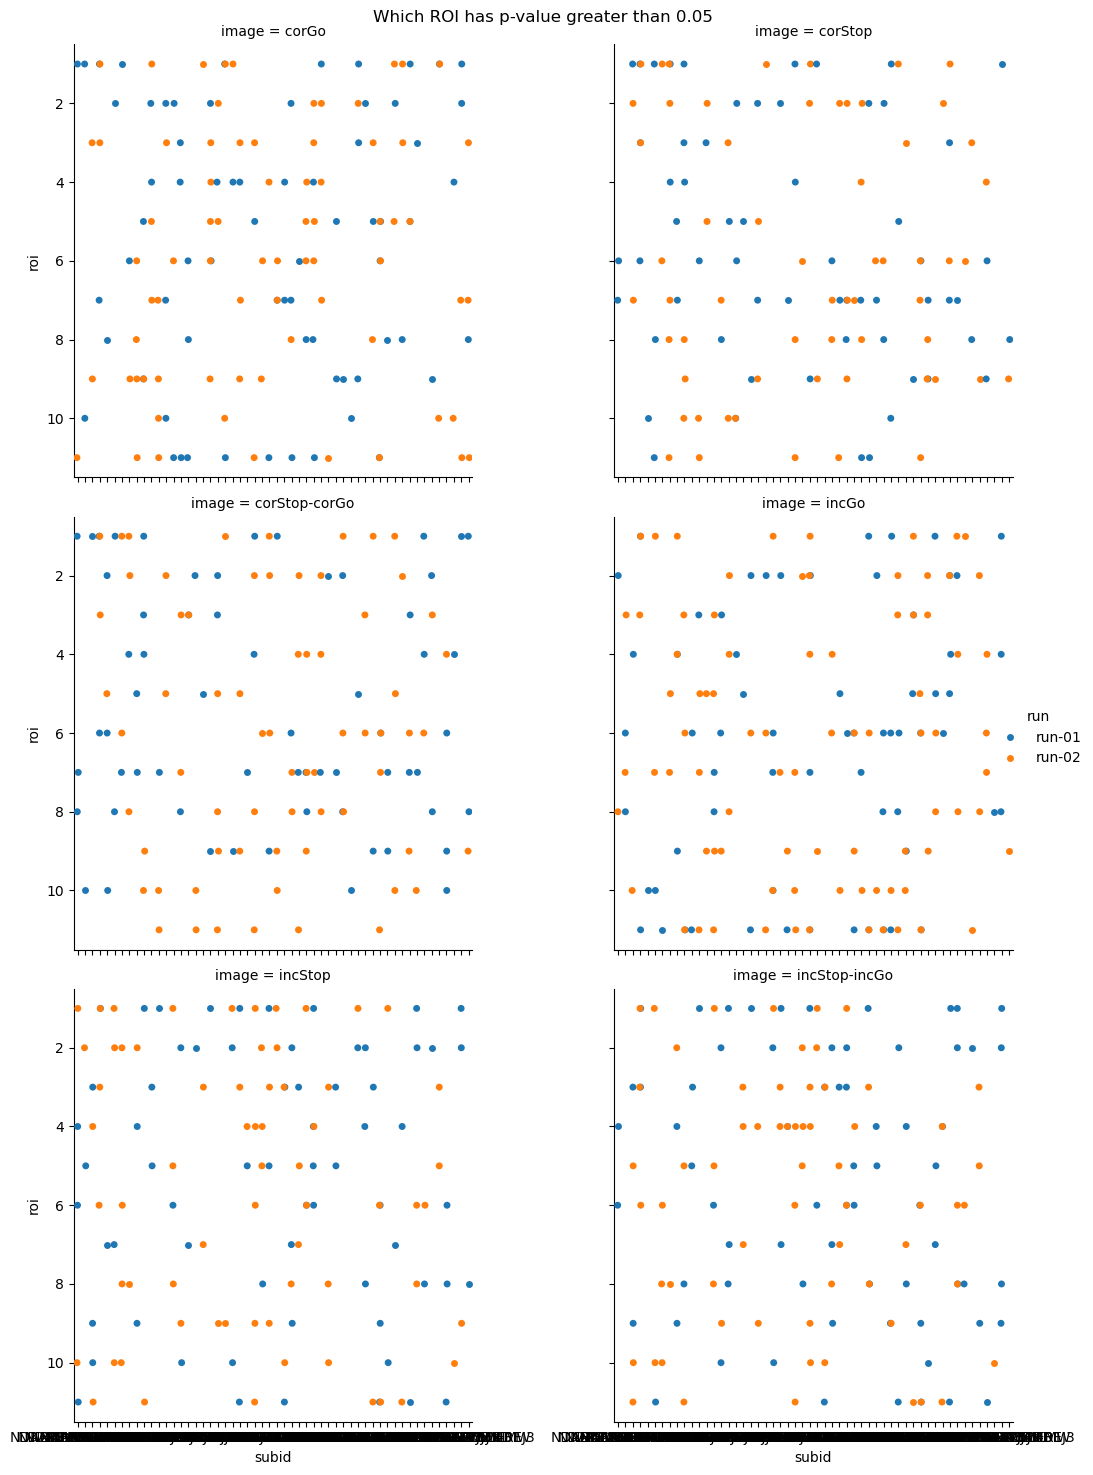

In [59]:
g = sns.catplot(df_plot_1, x="subid",y="roi", hue="run",col="image",col_wrap=2)
g.figure.suptitle("Which ROI has p-value greater than 0.05")
g.figure.tight_layout()

In [60]:
df_plot_2 = df_p_perid.reset_index().query("activation > 0.05").groupby(["subid", "image", "run"])["roi"].count().reset_index()#["subid"].unique()
df_plot_2

,subid,image,run,roi
0,NDARINV003RTV85,corGo,run-01,1
1,NDARINV003RTV85,corGo,run-02,1
2,NDARINV003RTV85,corStop,run-01,2
3,NDARINV003RTV85,corStop-corGo,run-01,3
4,NDARINV003RTV85,incGo,run-01,1
...,...,...,...,...
455,NDARINV0BEHBEJ3,corStop,run-02,1
456,NDARINV0BEHBEJ3,corStop-corGo,run-01,2
457,NDARINV0BEHBEJ3,corStop-corGo,run-02,1
458,NDARINV0BEHBEJ3,incGo,run-02,1


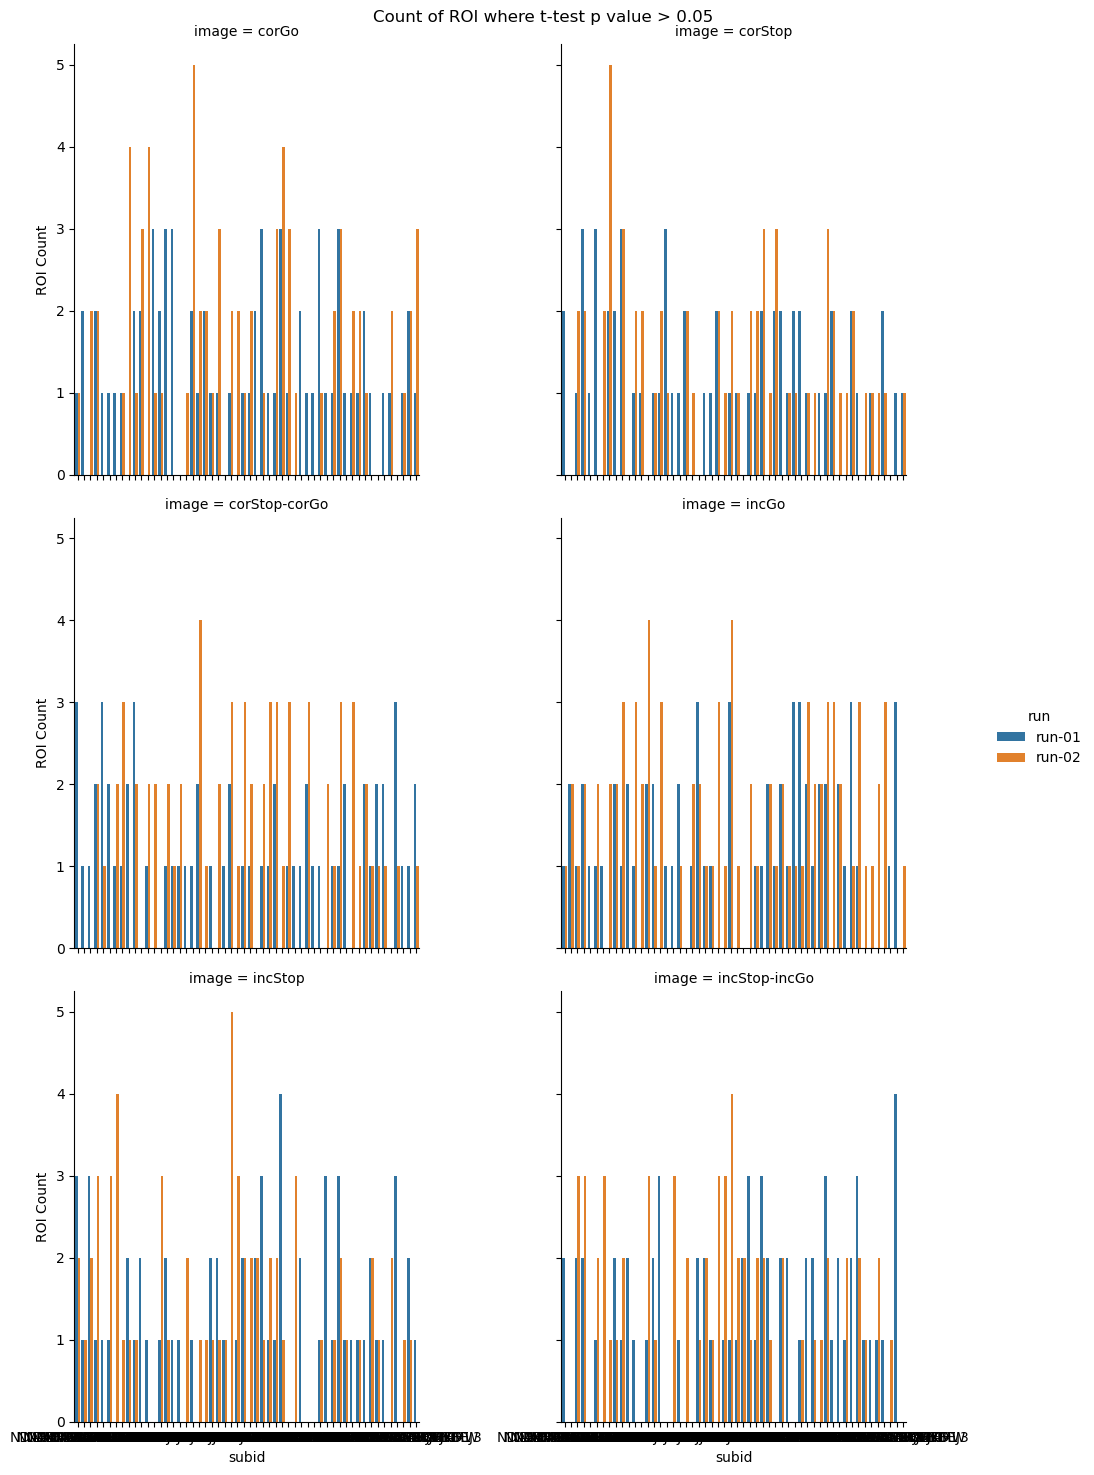

In [61]:
g = sns.catplot(df_plot_2.rename({"roi":"roi_count"},axis=1), x="subid",y="roi_count", hue="run", col="image", kind="bar", col_wrap=2)
g.set_ylabels("ROI Count")
g.figure.suptitle("Count of ROI where t-test p value > 0.05")
g.tight_layout()

In [70]:
df_p = df_neur.groupby(["image","run","roi"])[["activation"]].agg(lambda ds: st.ttest_1samp(ds, popmean=0).pvalue)
df_p.reset_index().query("activation > 0.05").rename({"activation":"pvalue"}, axis=1) #sns.catplot(df_p_perid.reset_index(), x="image", y="activation", col="run", hue="roi", kind="box")

,image,run,roi,pvalue
24,corStop,run-01,3,0.240724
46,corStop-corGo,run-01,3,0.224005


In [71]:
df_p = df_neur.groupby(["run","roi"])[["activation"]].agg(lambda ds: st.ttest_1samp(ds, popmean=0).pvalue)
df_p.reset_index().query("activation > 0.05").rename({"activation":"pvalue"}, axis=1) #sns.catplot(df_p_perid.reset_index(), x="image", y="activation", col="run", hue="roi", kind="box")

,run,roi,pvalue


In [62]:
df_neur = pd.read_csv("roi_activation_all.csv")
df_neur

,x,y,z,activation,roi,subid,image,run
0,46,87,29,-0.685750,10,NDARINV003RTV85,corGo,run-01
1,45,85,30,-0.049403,10,NDARINV003RTV85,corGo,run-01
2,46,85,30,0.137194,10,NDARINV003RTV85,corGo,run-01
3,47,85,30,0.188199,10,NDARINV003RTV85,corGo,run-01
4,44,86,30,-0.315609,10,NDARINV003RTV85,corGo,run-01
...,...,...,...,...,...,...,...,...
876739,57,66,67,-0.356797,5,NDARINV0BEHBEJ3,incStop-incGo,run-02
876740,58,66,67,-0.702194,5,NDARINV0BEHBEJ3,incStop-incGo,run-02
876741,59,66,67,-1.229823,5,NDARINV0BEHBEJ3,incStop-incGo,run-02
876742,30,68,67,-0.171098,6,NDARINV0BEHBEJ3,incStop-incGo,run-02


In [27]:
np.unique(df["roi"].values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
roi_labels = pd.read_csv("roi_labels.csv", sep="\t")
roi_labels.set_index("Node_Number")["Node"]

Node_Number
1                   lAI (left anterior insula)
2                  rAI (right anterior insula)
3             lMFG (left middle frontal gyrus)
4                                         rMFG
5                lFEF (left frontal eye field)
6                                         rFEF
7             lIPL (left intraparietal lobule)
8                                         rIPL
9             PCC (posterior cingulate cortex)
10    VMPFC (ventral medial prefrontal cortex)
11     DMPFC (dorsal medial prefrontal cortex)
Name: Node, dtype: object

In [8]:
df_neur["roi_label"] = df_neur["roi"].map(roi_labels.set_index("Node_Number")["Node"])
df_neur

,x,y,z,activation,roi,subid,image,run,roi_label
0,46,87,29,-0.685750,10,NDARINV003RTV85,corGo,run-01,VMPFC (ventral medial prefrontal cortex)
1,45,85,30,-0.049403,10,NDARINV003RTV85,corGo,run-01,VMPFC (ventral medial prefrontal cortex)
2,46,85,30,0.137194,10,NDARINV003RTV85,corGo,run-01,VMPFC (ventral medial prefrontal cortex)
3,47,85,30,0.188199,10,NDARINV003RTV85,corGo,run-01,VMPFC (ventral medial prefrontal cortex)
4,44,86,30,-0.315609,10,NDARINV003RTV85,corGo,run-01,VMPFC (ventral medial prefrontal cortex)
...,...,...,...,...,...,...,...,...,...
876739,57,66,67,-0.356797,5,NDARINV0BEHBEJ3,incStop-incGo,run-02,lFEF (left frontal eye field)
876740,58,66,67,-0.702194,5,NDARINV0BEHBEJ3,incStop-incGo,run-02,lFEF (left frontal eye field)
876741,59,66,67,-1.229823,5,NDARINV0BEHBEJ3,incStop-incGo,run-02,lFEF (left frontal eye field)
876742,30,68,67,-0.171098,6,NDARINV0BEHBEJ3,incStop-incGo,run-02,rFEF


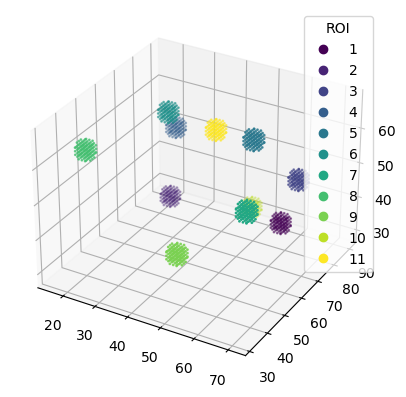

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
df = df_neur.query("subid == 'NDARINV003RTV85' & image == 'corGo' & run == 'run-01'")

#for key, df in df_neur.query("subid == 'NDARINV003RTV85' & image == 'corGo' & run == 'run-01'").groupby("roi"): 
scatter = ax.scatter(df["x"], df["y"], df["z"], c=df["roi"], s=1)
ax.legend(*scatter.legend_elements(), title="ROI")


In [64]:
scatter.legend_elements()

([<matplotlib.lines.Line2D at 0x7fb5c977e1d0>,
 ['$\\mathdefault{1}$',
  '$\\mathdefault{2}$',
  '$\\mathdefault{3}$',
  '$\\mathdefault{4}$',
  '$\\mathdefault{5}$',
  '$\\mathdefault{6}$',
  '$\\mathdefault{7}$',
  '$\\mathdefault{8}$',
  '$\\mathdefault{9}$',
  '$\\mathdefault{10}$',
  '$\\mathdefault{11}$'])

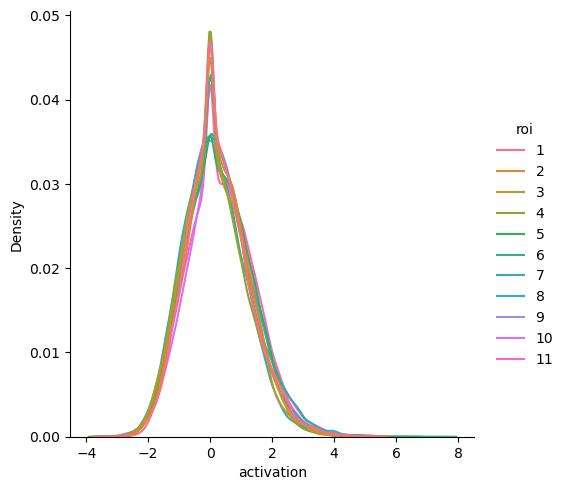

In [64]:
import seaborn as sns
sns.displot(df_neur.astype({"roi":"category"}), x="activation", hue="roi", kind="kde")